<a href="https://colab.research.google.com/github/ATPYINACAP/AT/blob/main/AT2_U1_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import pandas as pd

# Ruta al archivo Excel
file_path = '/content/drive/MyDrive/CBPR01/AT02/AT2 Instituciones de Educacion en Chile.xlsx'

# Leer el archivo Excel
df = pd.read_excel(file_path)

**ACTIVIDAD 01**

Considerando los datos de la base "Instituciones de Educacion en Chile"

In [66]:
df.columns

Index(['LUGAR DE ESTUDIO', 'CANTIDAD DE PERSONAS'], dtype='object')

In [67]:
# a) Determinar el total de personas que estudian en instituciones educacionales del país
suma_columna = df['CANTIDAD DE PERSONAS'].sum()
print(f'El total de instituciones educacionales del país: {suma_columna}')

El total de instituciones educacionales del país: 1878642


In [68]:
df

,LUGAR DE ESTUDIO,CANTIDAD DE PERSONAS
0,MUNICIPAL / LOCAL / CORPORACIONES,426155
1,PARTICULAR SUBVENCIONADO,837310
2,JARDÍN INFANTIL O SALA CUNA DEL LUGAR DE TRABAJO,12187
3,CENTRO DE FORMACIÓN TÉCNICA,18966
4,INSTITUTO PROFESIONAL,160229
5,UNIVERSIDAD,423011
6,FUERZAS ARMADAS,784


In [69]:
# b) ¿Cuantas personas estudian en un instituto profesional?
cantidad= df["CANTIDAD DE PERSONAS"][4]
print(f'La cantidad de personas estudian en un instituto profesional {cantidad}')

La cantidad de personas estudian en un instituto profesional 160229


**ACTIVIDAD 02**

Considerando la variable aleatoria

$X$ : " *Estudiantes de un instituto profesional* "

In [70]:
# a) Determine probabilidad de éxito

# identifica casos favorables, asignadolo a casos_fav
casos_fav=df["CANTIDAD DE PERSONAS"][4]

# identifica y calcula casos totales, asignadolo a total
total=df["CANTIDAD DE PERSONAS"].sum()

# calcula prob. de éxito
p=casos_fav/total

# redondear con 5 dec. prob. de éxito
p=round(p,5)

# muestra resultado
print(f'La probabilidad de éxito es: {p}')

La probabilidad de éxito es: 0.08529


In [71]:
casos_fav,total,p

(160229, 1878642, 0.08529)

In [72]:
# b) Determine probabilidad de fracaso

# Calcula prob de fracaso q.
q=1-p

# redondear con 5 dec. prob. de fracaso
q=round(q,5)

# muestra resultado
print(f'La probabilidad de fracaso es: {q}')

La probabilidad de fracaso es: 0.91471


**ACTIVIDAD 03**

Considerando la variable aleatoria de la pregunta 02. Si se escogen tres personas al azar, complete la tabla de distribución de probabilidades

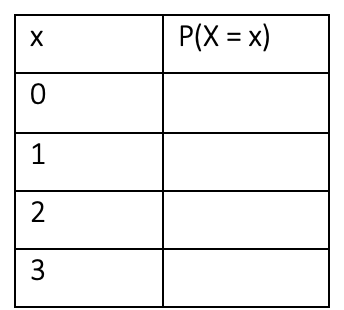

In [73]:
# Primero usaremos p, definida en la pregunta anterior.


In [74]:
# Crear tablas con las posibles combinaciones de escoger 3 personas
# que estudien en "intituto profesional" definida en pregunta 2
data = {
    'p1': ['no', 'no', 'no', 'no', 'si', 'si', 'si', 'si'],
    'p2': ['no', 'no', 'si', 'si', 'no', 'no', 'si', 'si'],
    'p3': ['no', 'si', 'no', 'si', 'no', 'si', 'no', 'si']
}
tabla = pd.DataFrame(data)

# Agregar la columna 'X' que cuenta la cantidad de "si" por fila
tabla['X'] = tabla.apply(lambda row: row.tolist().count('si'), axis=1)

# Mostrar la tabla
print(tabla)
# El recorrido de la varible será x={0,  1, 2, 3}

   p1  p2  p3  X
0  no  no  no  0
1  no  no  si  1
2  no  si  no  1
3  no  si  si  2
4  si  no  no  1
5  si  no  si  2
6  si  si  no  2
7  si  si  si  3


In [75]:
# Creación de tabla de distribución de prob.
tabla2 ={
    'x': ['0', '1', '2',"3"],
    'p(X=x)': [q*q*q, p*q*q*3, p*p*q*3, p*p*p]
    }
tabla2 = pd.DataFrame(tabla2)
print(tabla2)

   x    p(X=x)
0  0  0.765333
1  1  0.214085
2  2  0.019962
3  3  0.000620


In [76]:
# Verificando si la suma de las prob es 1
suma_p1 = tabla2['p(X=x)'].sum()
suma_p1

1.0000000000000002

In [77]:
# Usando comandos de Python es posible determinar cada una de la probabilidades
# anteriores.

# Opción 01

# Libreria para cálculos estadísticos
from scipy.stats import binom
n=3

# P(X=0)
prob0 = binom.pmf(0, n, p)

#P(X=1)
prob1 = binom.pmf(1, n, p)

#P(X=2)
prob2 = binom.pmf(2, n, p)

#P(X=3)
prob3 = binom.pmf(3, n, p)

# Creación de tabla de distribución de prob.
tabla_dist ={
    'x': ['0', '1', '2',"3"],
    'P(X=x)': [prob0, prob1, prob2, prob3]
    }
tabla_dist = pd.DataFrame(tabla_dist)

# Mostrar resultado
print(tabla_dist)

   x    P(X=x)
0  0  0.765333
1  1  0.214085
2  2  0.019962
3  3  0.000620


In [78]:
# Opción 02

from scipy.stats import binom
n = 3
# x es una lista con 4 valores
x = range(n+1)

# Calcular la probabilidad de cada valor de x
prob = binom.pmf(x, n, p)

# Convertir en data frame
prob=pd.DataFrame(prob)

# Renombrar columnas
prob = prob.rename(columns={0: 'P(X=x)'})

# Mostrar distribución de proba
print(prob)

     P(X=x)
0  0.765333
1  0.214085
2  0.019962
3  0.000620


**ACTIVIDAD 04**

En base a la distribución de Probabilidades, realice:

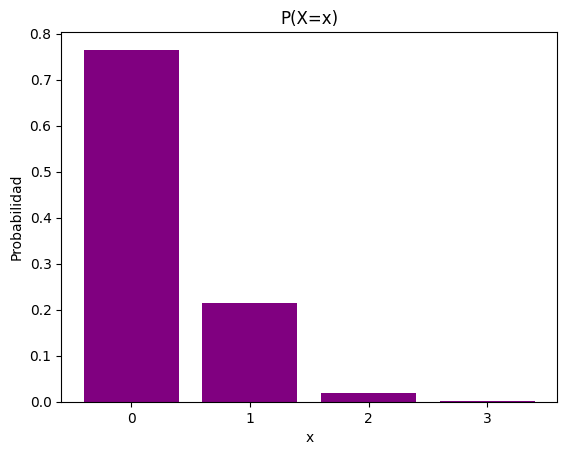

In [79]:
# a) Gráfico de Distribución de probabilidad

# Crear el gráfico de barras
import matplotlib.pyplot as plt

# Primer parametro valor eje x, segundo parametro eje y.
plt.bar(tabla2['x'], tabla2['p(X=x)'], color='purple')

# Añadir títulos y etiquetas
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.title('P(X=x)')

# Mostrar el gráfico
plt.show()

In [80]:
# b) Gráfico de Distribución de Prob. Acumuladas

tabla_AC = {
    'x': ['0', '1', '2', '3'],
    r'$p(X \leq x)$': [q**3, p*q*q*3+q**3, p*p*q*3+p*q*q*3+q**3, p*p*p+p*p*q*3+p*q*q*3+q**3]
}
tabla_AC = pd.DataFrame(tabla_AC)
print(tabla_AC)

   x  $p(X \leq x)$
0  0       0.765333
1  1       0.979418
2  2       0.999380
3  3       1.000000


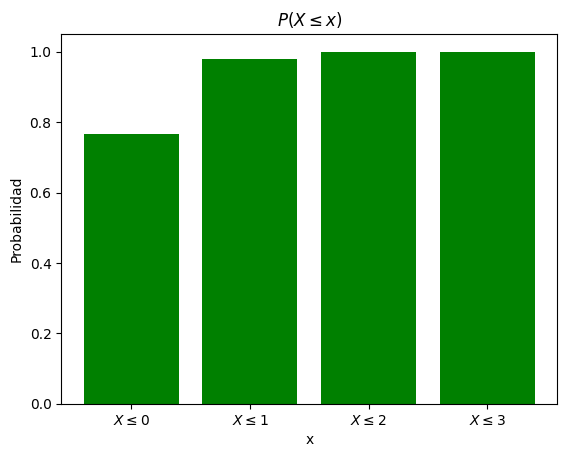

In [81]:
plt.bar(tabla_AC['x'], tabla_AC[r'$p(X \leq x)$'], color='green')

# Personalizar las etiquetas del eje X
labels = ['$X \leq 0$', '$X \leq 1$', '$X \leq 2$', '$X \leq 3$']
plt.xticks(ticks=tabla_AC['x'],
           labels=labels,
           fontweight='bold')

# Añadir títulos y etiquetas
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.title('$P(X \leq x)$')

# Mostrar el gráfico
plt.show()


In [82]:
from scipy.stats import binom
n = 3
x = range(n+1)
prob = binom.pmf(x, n, p)
# prob=pd.DataFrame(prob)
# prob

Text(0.5, 1.0, 'Binomial Probability Mass Function')

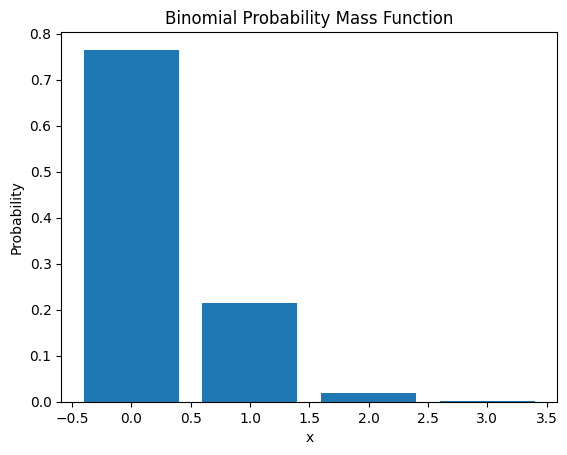

In [83]:
import matplotlib.pyplot as plt
plt.bar(x, prob)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Binomial Probability Mass Function')